
### import Neseccary packages


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from warnings import filterwarnings
filterwarnings('ignore')




### Read Data And Show it



In [2]:
file_path = "/kaggle/input/student-performance-multiple-linear-regression/Student_Performance.csv"
student = pd.read_csv(file_path)

student.shape

(10000, 6)

In [3]:
student.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [4]:
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB




### check missing values



In [5]:
student.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64



### check outliers




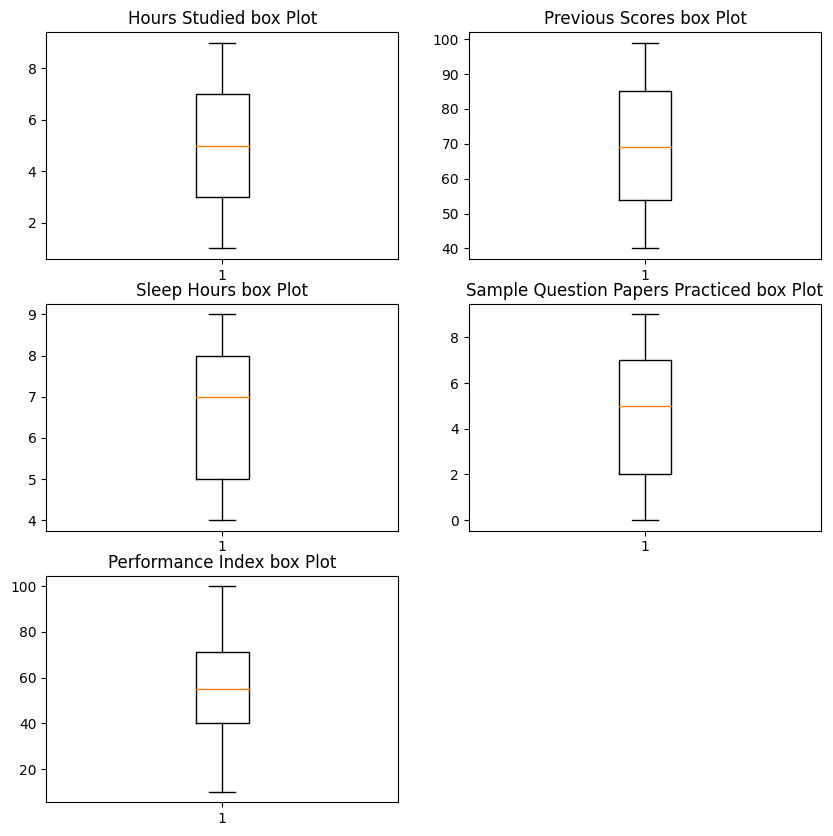

In [6]:
cols=student.select_dtypes('number').columns
plt.figure(figsize=(10,10))
for i, col in enumerate(cols):
    plt.subplot(3,2 , i+1)
    plt.boxplot(student[col])
    plt.title(f"{col} box Plot")



### EDA




### Histograms


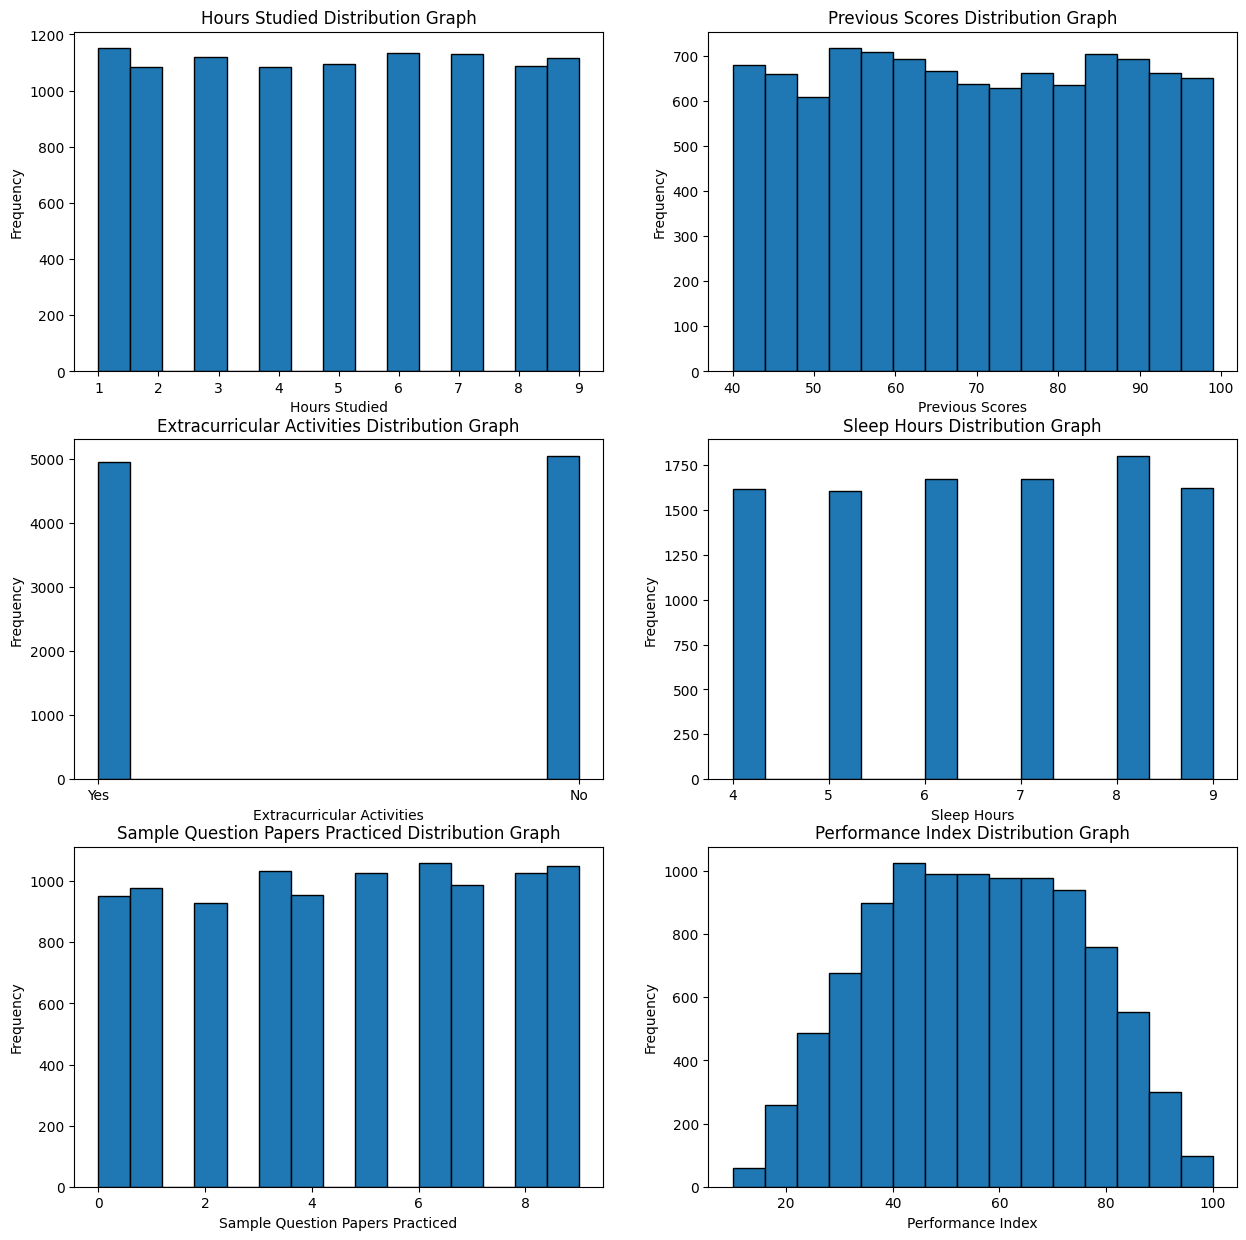

In [7]:

plt.figure(figsize=(15, 15))
for i, col in enumerate(student.columns):
    plt.subplot(3, 2, i+1)
    plt.hist(student[col], edgecolor= 'k', bins=15)
    plt.xlabel(f"{col}")
    plt.ylabel('Frequency')
    plt.title(f"{col} Distribution Graph")
plt.show()

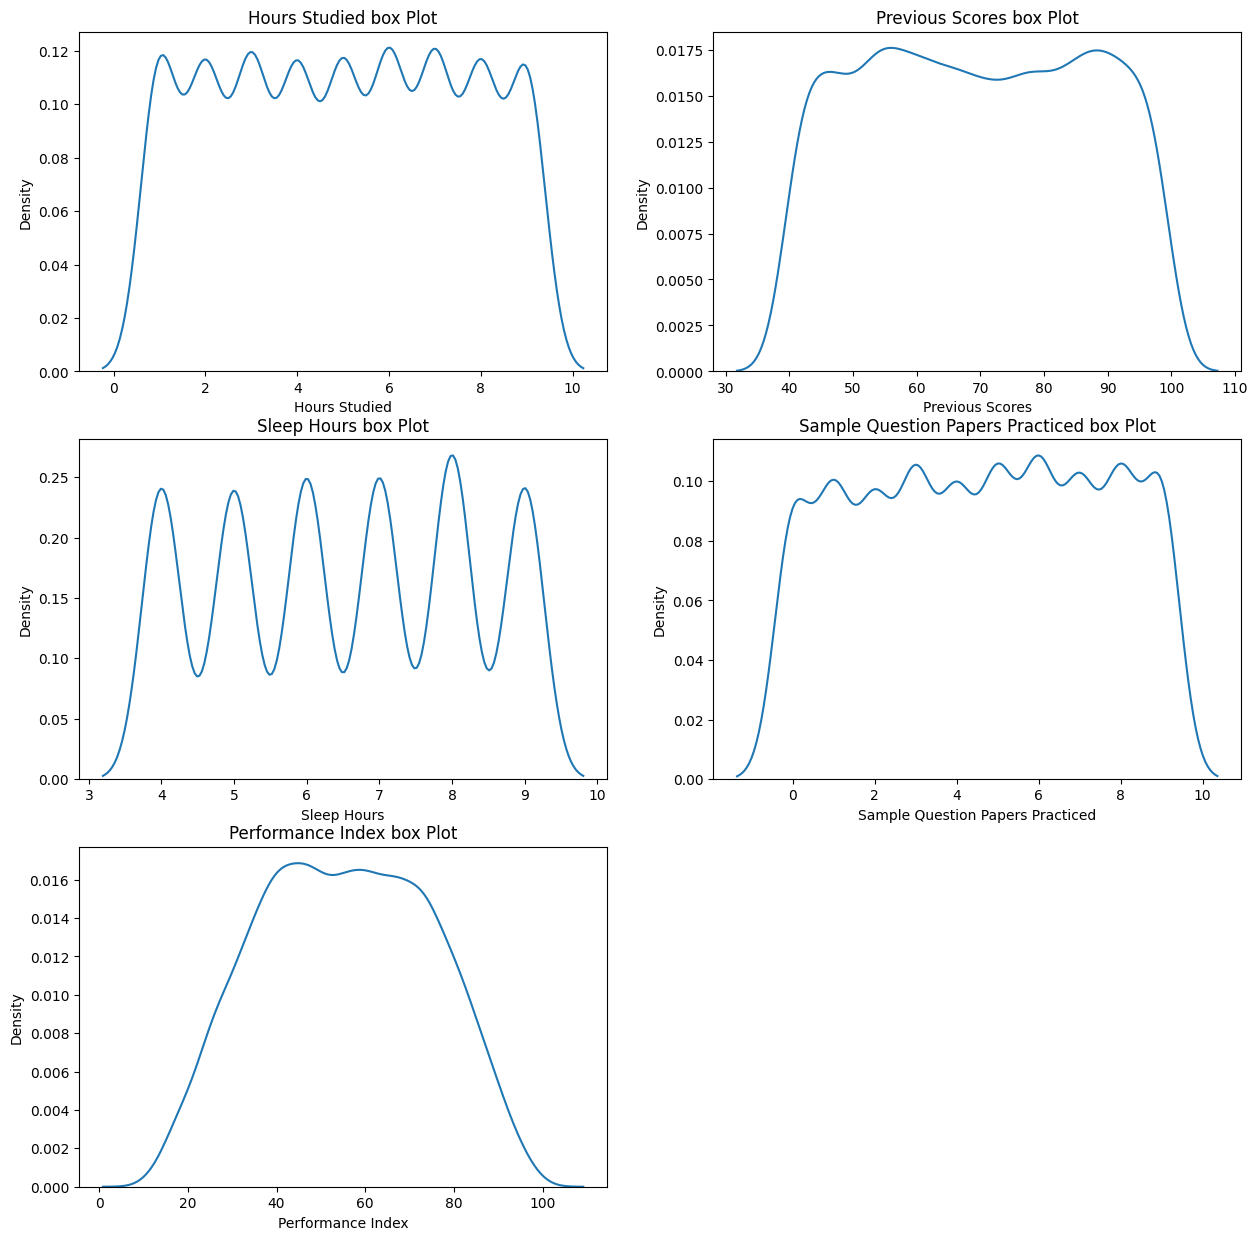

In [8]:

plt.figure(figsize=(15, 15))
for i, col in enumerate(cols):
    plt.subplot(3, 2, i+1)
    sns.kdeplot(student[col])
    plt.title(f"{col} box Plot")
plt.show()

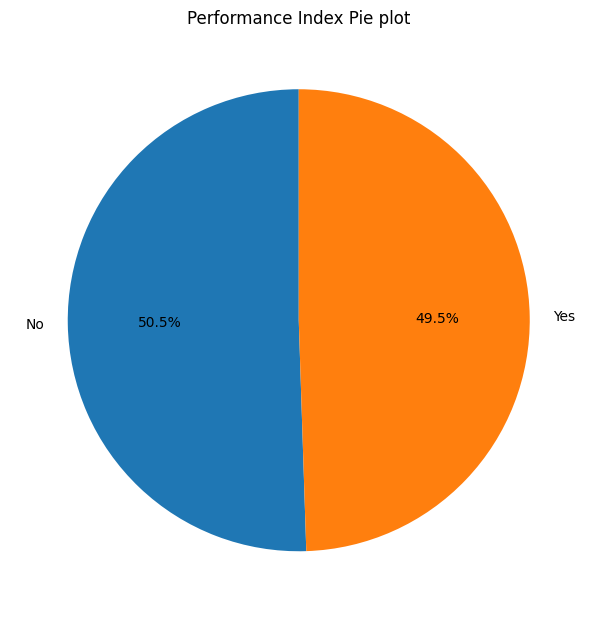

In [9]:

plt.figure(figsize=(7.5, 7.5))
unique = student['Extracurricular Activities'].value_counts()
count = unique.values
categories = unique.index
plt.pie(count, labels=categories ,autopct="%1.1f%%", startangle=90)
plt.title(f"{col} Pie plot")
plt.subplots_adjust(hspace=0.8, wspace=0.3)
plt.show()

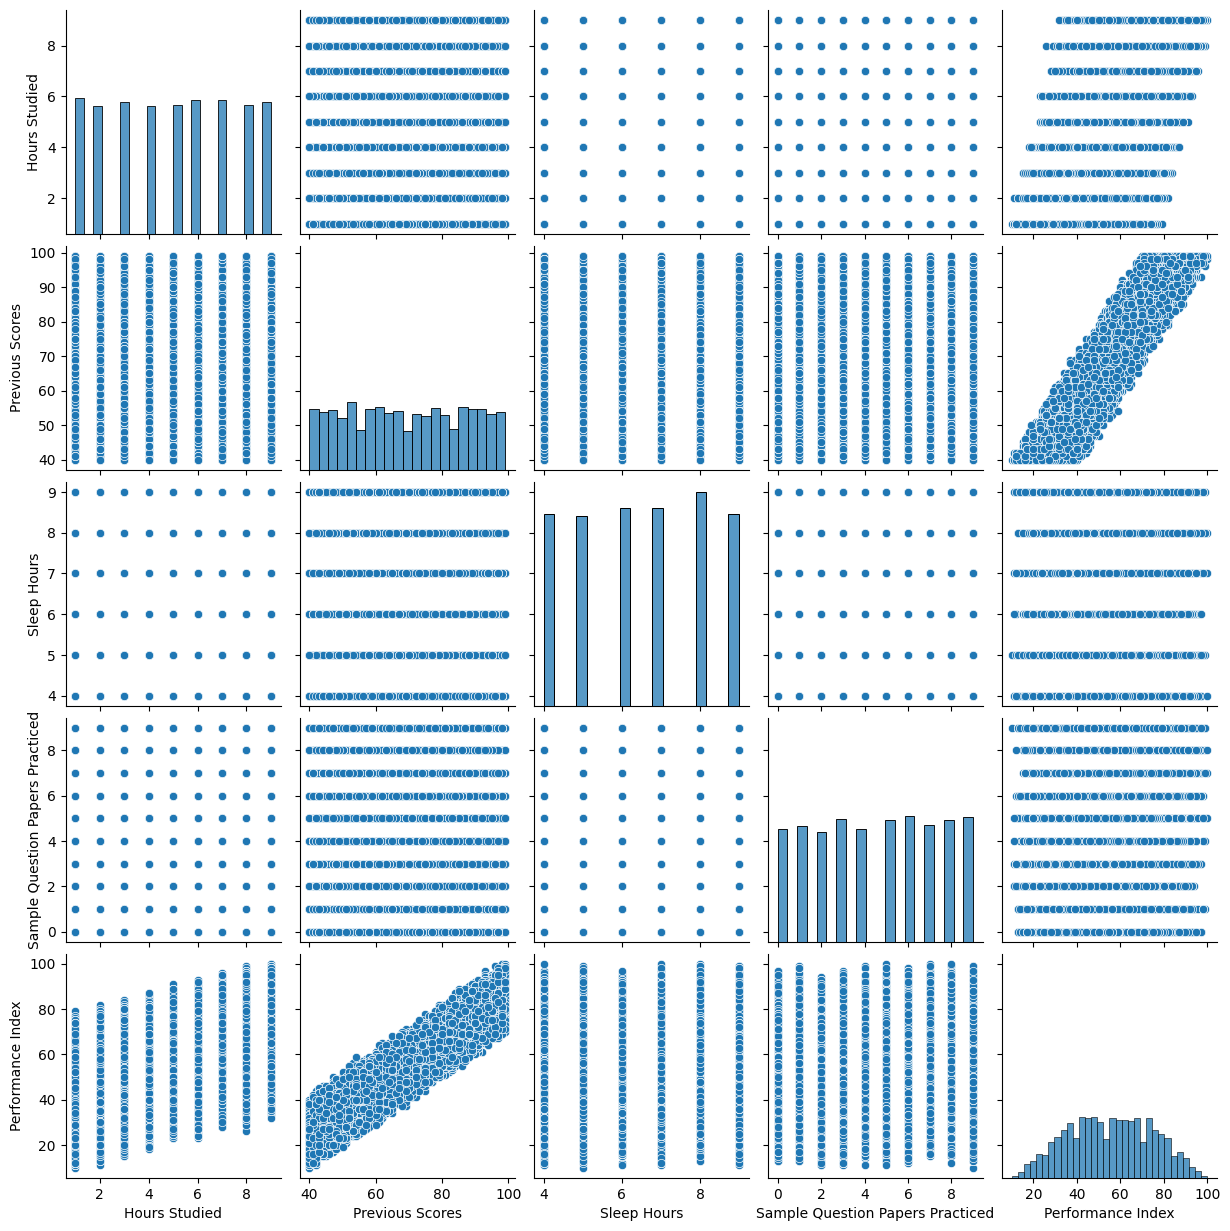

In [10]:
sns.pairplot(student)

In [11]:
col=student.select_dtypes('number').columns
corr_matrix=student[col].corr()
label = corr_matrix["Performance Index"].sort_values(ascending=False)
label

Performance Index                   1.000000
Previous Scores                     0.915189
Hours Studied                       0.373730
Sleep Hours                         0.048106
Sample Question Papers Practiced    0.043268
Name: Performance Index, dtype: float64



### Visualize correlation



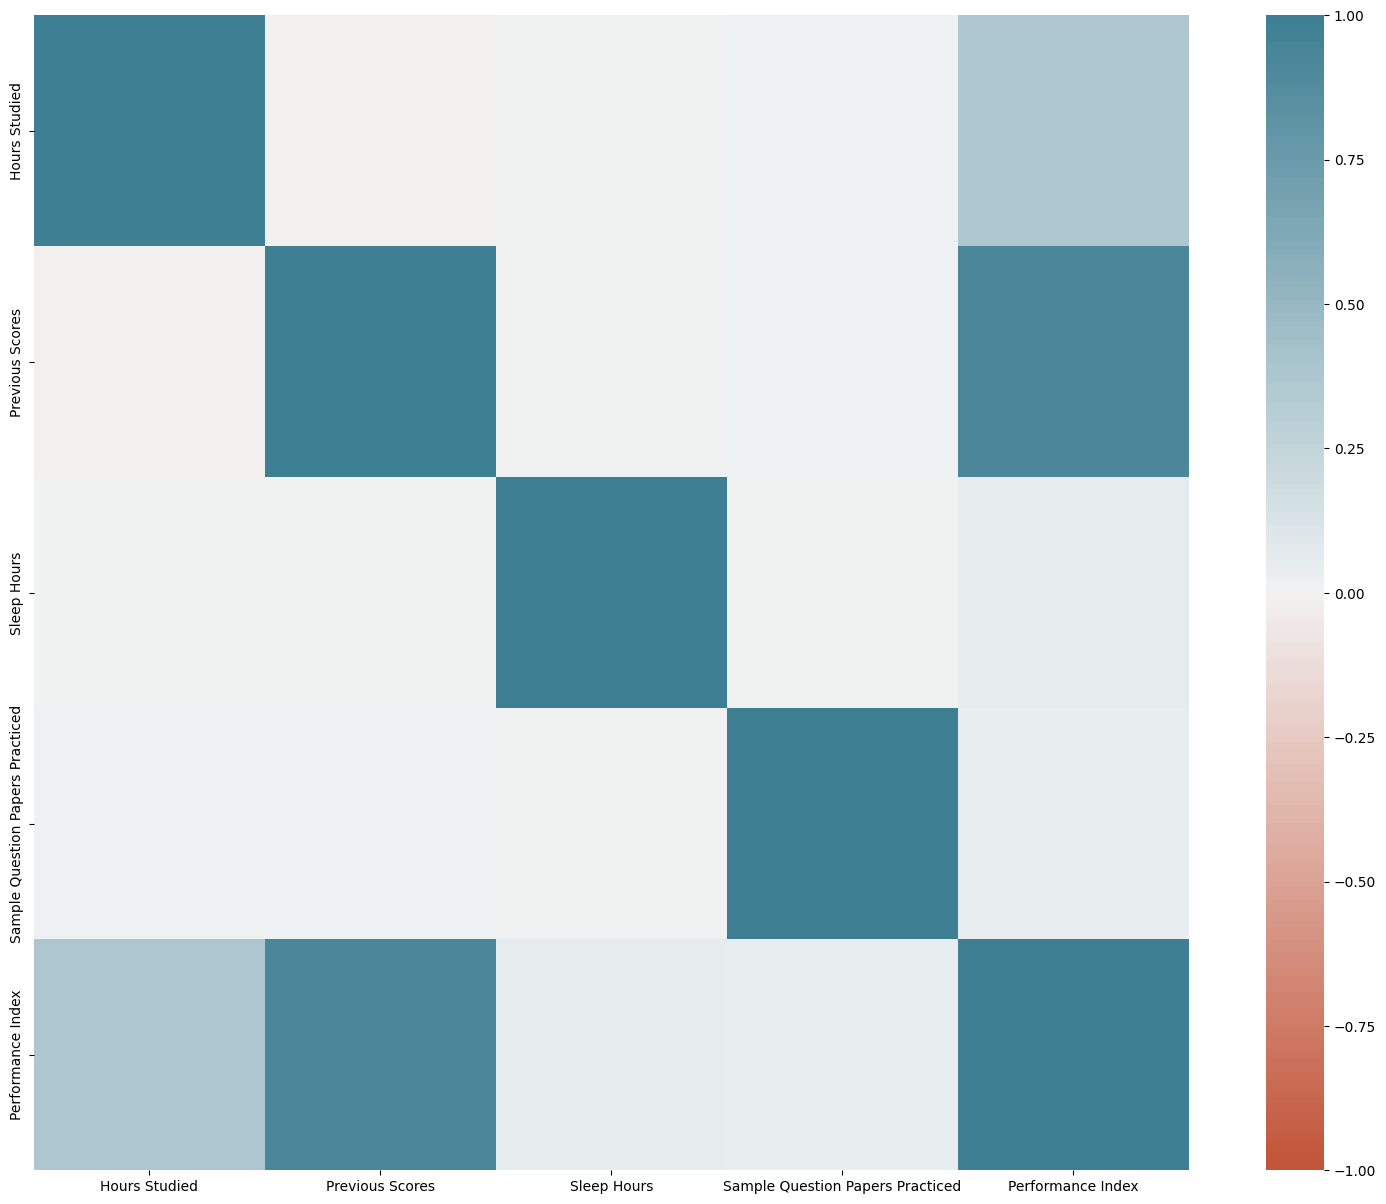

In [12]:

plt.subplots(figsize=(20,15))
ax = sns.heatmap(
    corr_matrix,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)



### check duplicate



In [13]:

student.duplicated().sum()

127

In [14]:
#remove it
student.drop_duplicates(inplace=True)
student.duplicated().sum()

0



### Normalization



In [15]:
#rescalling
from sklearn.preprocessing import MinMaxScaler

numCol = student.select_dtypes('number').columns
scalar = MinMaxScaler()
scalar.fit(student[numCol])
student[numCol] = scalar.transform(student[numCol])

student.head(15)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,0.750,1.000000,Yes,1.0,0.111111,0.900000
1,0.375,0.711864,No,0.0,0.222222,0.611111
2,0.875,0.186441,Yes,0.6,0.222222,0.388889
3,0.500,0.203390,Yes,0.2,0.222222,0.288889
4,0.750,0.593220,No,0.8,0.555556,0.622222
5,0.250,0.644068,No,1.0,0.666667,0.566667
6,0.750,0.559322,Yes,0.2,0.666667,0.588889
7,0.875,0.084746,Yes,0.0,0.666667,0.355556
8,0.500,0.627119,No,0.8,0.222222,0.566667
9,0.375,0.830508,No,0.0,0.000000,0.655556




### Encoding String features



In [16]:
#encoding
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,LabelEncoder
encoder=LabelEncoder()
student['Extracurricular Activities'] = encoder.fit_transform(student['Extracurricular Activities'])
student.head(10)


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,0.750,1.000000,1,1.0,0.111111,0.900000
1,0.375,0.711864,0,0.0,0.222222,0.611111
2,0.875,0.186441,1,0.6,0.222222,0.388889
3,0.500,0.203390,1,0.2,0.222222,0.288889
4,0.750,0.593220,0,0.8,0.555556,0.622222
5,0.250,0.644068,0,1.0,0.666667,0.566667
6,0.750,0.559322,1,0.2,0.666667,0.588889
7,0.875,0.084746,1,0.0,0.666667,0.355556
8,0.500,0.627119,0,0.8,0.222222,0.566667
9,0.375,0.830508,0,0.0,0.000000,0.655556




#### function to Scatter Plot of Predicted vs. Actual Values



In [17]:
 def plot_predicted_vs_actual_seaborn(actual_y, predicted_y):

     actual_y = np.array(actual_y)
     predicted_y = np.array(predicted_y)

     plt.figure(figsize=(8, 8))
     plt.scatter(predicted_y, actual_y, alpha=0.6)
     
     # Add a line for perfect predictions
     min_val = min(np.min(actual_y), np.min(predicted_y))
     max_val = max(np.max(actual_y), np.max(predicted_y))

     plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', lw=2, label='Ideal prediction')
     
     plt.xlabel("Predicted Values")
     plt.ylabel("Actual Values")
     plt.title("Predicted vs. Actual Values")
     plt.grid(True, linestyle='--', alpha=0.5)
     plt.legend()
     plt.tight_layout()
     plt.show()




### spliting Data to train ,validation and test



In [18]:
X=student.drop(columns=['Performance Index']) # drop label
y=student['Performance Index']
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.3, random_state=42)

In [19]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
X_val_pca = pca.fit_transform(X_val) # apply PCA on val data
X_test_pca = pca.transform(X_test) # transform test data
X_val_pca.shape

(2073, 1)



### Use Linear Regression Model



In [20]:
model=LinearRegression()
#train model
model.fit(X_train,y_train)

LinearRegression()

In [21]:
model.score(X_train,y_train)

0.9888937265788157

In [22]:
y_pred_val=model.predict(X_val)

In [23]:
e1=mean_squared_error(y_val, y_pred_val)
print('MSE for validation data ',e1)

MSE for validation data  0.0005173843386250171


In [24]:
y_pred_test=model.predict(X_test)

In [25]:
e2=mean_squared_error(y_test, y_pred_test)
print('MSE for testing data ',e2)

MSE for testing data  0.0005730658948524408


In [26]:

pd.DataFrame(np.c_[y_pred_test, y_test,np.sqrt(y_pred_test-y_test)/(2*len(y_test))], columns=["prediction", "Actual","cost error"])



,prediction,Actual,cost error
0,0.191062,0.188889,0.000026
1,0.316943,0.288889,0.000094
2,0.517840,0.488889,0.000096
3,0.621285,0.611111,0.000057
4,0.313197,0.355556,NaN
...,...,...,...
884,0.600672,0.622222,NaN
885,0.610253,0.611111,NaN
886,0.902991,0.911111,NaN
887,0.266220,0.255556,0.000058


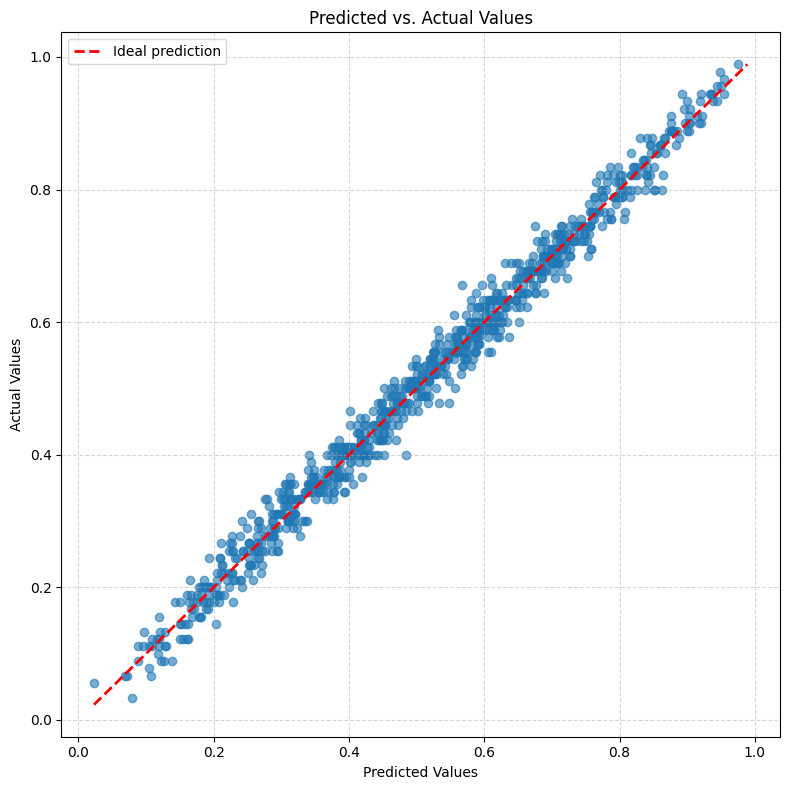

In [27]:
plot_predicted_vs_actual_seaborn(y_test,y_pred_test)



### Use SVR Model



In [28]:
modell=SVR()
#train model
modell.fit(X_train,y_train)

SVR()

In [29]:
y_pred_val=modell.predict(X_val)

In [30]:
e1=mean_squared_error(y_val, y_pred_val)
print('MSE for validation data ',e1)

MSE for validation data  0.0012362456415388407


In [31]:
y_pred_test=modell.predict(X_test)

In [32]:
e2=mean_squared_error(y_test, y_pred_test)
print('MSE for testing data ',e2)

MSE for testing data  0.0013640609211388887


In [33]:

pd.DataFrame(np.c_[y_pred_test, y_test,np.sqrt(y_pred_test-y_test)/(2*len(y_test))], columns=["prediction", "Actual","cost error"])



,prediction,Actual,cost error
0,0.175827,0.188889,NaN
1,0.312187,0.288889,0.000086
2,0.522154,0.488889,0.000103
3,0.666009,0.611111,0.000132
4,0.269224,0.355556,NaN
...,...,...,...
884,0.633875,0.622222,0.000061
885,0.604526,0.611111,NaN
886,0.889242,0.911111,NaN
887,0.231888,0.255556,NaN


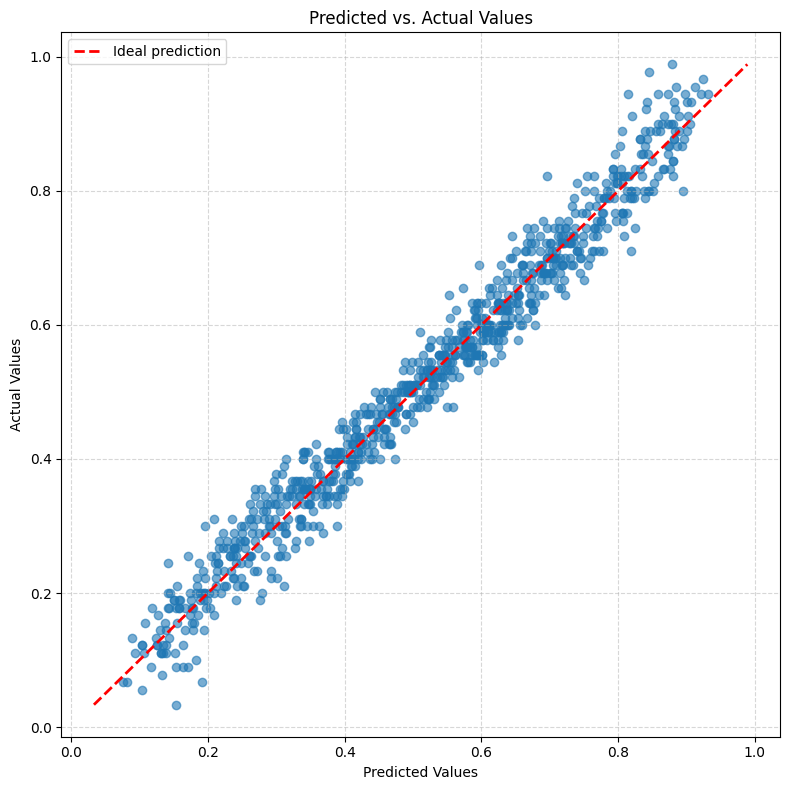

In [34]:
plot_predicted_vs_actual_seaborn(y_test,y_pred_test)



### Use KNN



In [35]:
modelll=KNeighborsRegressor()
#train model
modelll.fit(X_train,y_train)

KNeighborsRegressor()

In [36]:
y_pred_val=modelll.predict(X_val)
e1=mean_squared_error(y_val, y_pred_val)
print('MSE for validation data ',e1)

MSE for validation data  0.001203763853900532


In [37]:
y_pred_test=modelll.predict(X_test)
e2=mean_squared_error(y_test, y_pred_test)
print('MSE for testing data ',e2)

MSE for testing data  0.0012987098834867864


In [38]:

pd.DataFrame(np.c_[y_pred_test, y_test,np.sqrt(y_pred_test-y_test)/(2*len(y_test))], columns=["prediction", "Actual","cost error"])



,prediction,Actual,cost error
0,0.206667,0.188889,0.000075
1,0.313333,0.288889,0.000088
2,0.535556,0.488889,0.000121
3,0.673333,0.611111,0.000140
4,0.322222,0.355556,NaN
...,...,...,...
884,0.564444,0.622222,NaN
885,0.600000,0.611111,NaN
886,0.877778,0.911111,NaN
887,0.266667,0.255556,0.000059


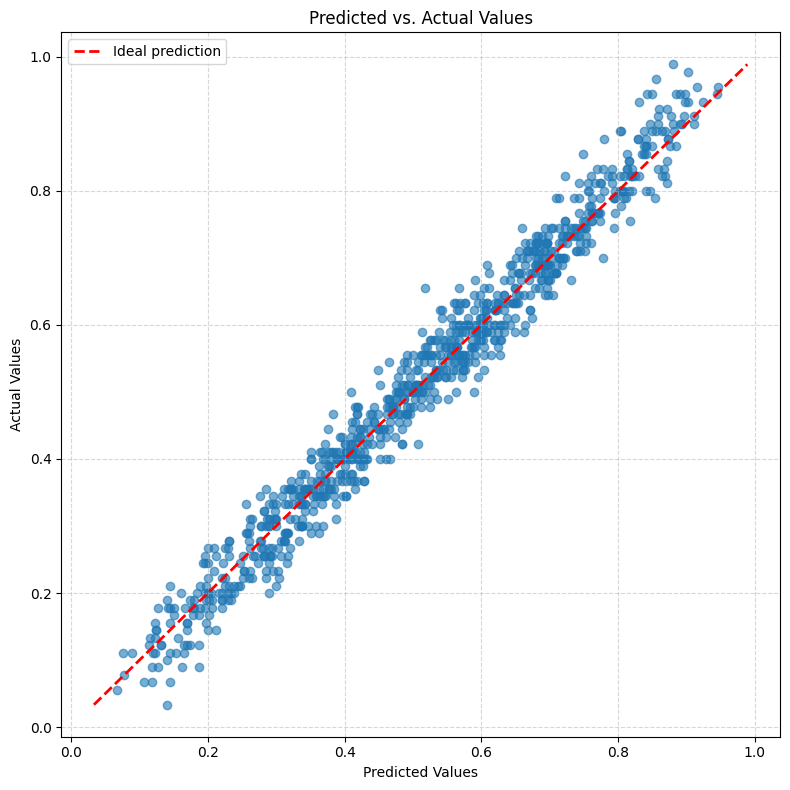

In [39]:
plot_predicted_vs_actual_seaborn(y_test,y_pred_test)



### Use Random forest



In [40]:
modellll=RandomForestRegressor()
#train model
modellll.fit(X_train,y_train)

RandomForestRegressor()

In [41]:
y_pred_val=modellll.predict(X_val)
e1=mean_squared_error(y_val, y_pred_val)
print('MSE for validation data ',e1)

MSE for validation data  0.0006810189633440821


In [42]:
y_pred_test=modellll.predict(X_test)
e2=mean_squared_error(y_test, y_pred_test)
print('MSE for testing data ',e2)

MSE for testing data  0.0007535876285085307


In [43]:

pd.DataFrame(np.c_[y_pred_test, y_test,np.sqrt(y_pred_test-y_test)/(2*len(y_test))], columns=["prediction", "Actual","cost error"])



,prediction,Actual,cost error
0,0.188667,0.188889,NaN
1,0.302841,0.288889,0.000066
2,0.501833,0.488889,0.000064
3,0.617330,0.611111,0.000044
4,0.339667,0.355556,NaN
...,...,...,...
884,0.601667,0.622222,NaN
885,0.625778,0.611111,0.000068
886,0.907815,0.911111,NaN
887,0.267889,0.255556,0.000062


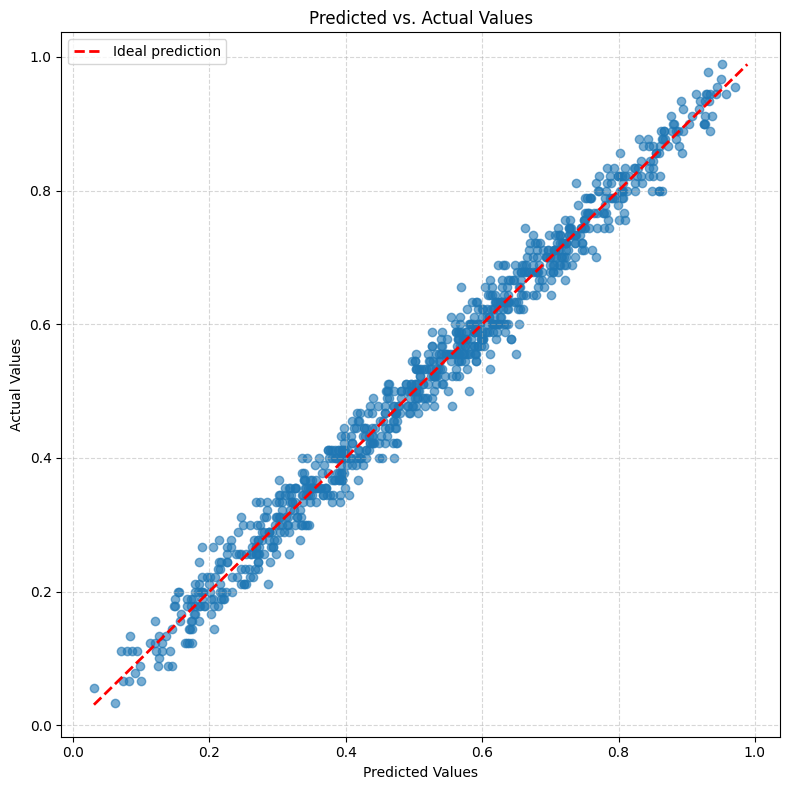

In [44]:
plot_predicted_vs_actual_seaborn(y_test,y_pred_test)



### Use GradientBoosting


In [45]:
modelllll=GradientBoostingRegressor()
#train model
modelllll.fit(X_train,y_train)

GradientBoostingRegressor()

In [46]:
y_pred_val=modelllll.predict(X_val)
e1=mean_squared_error(y_val, y_pred_val)
print('MSE for validation data ',e1)

MSE for validation data  0.0005567549326097434


In [47]:
y_pred_test=modelllll.predict(X_test)
e2=mean_squared_error(y_test, y_pred_test)
print('MSE for testing data ',e2)

MSE for testing data  0.0006066507942221339


In [48]:

pd.DataFrame(np.c_[y_pred_test, y_test,np.sqrt(y_pred_test-y_test)/(2*len(y_test))], columns=["prediction", "Actual","cost error"])



,prediction,Actual,cost error
0,0.191482,0.188889,0.000029
1,0.312465,0.288889,0.000086
2,0.514212,0.488889,0.000090
3,0.619145,0.611111,0.000050
4,0.320919,0.355556,NaN
...,...,...,...
884,0.607129,0.622222,NaN
885,0.617104,0.611111,0.000044
886,0.913298,0.911111,0.000026
887,0.269902,0.255556,0.000067


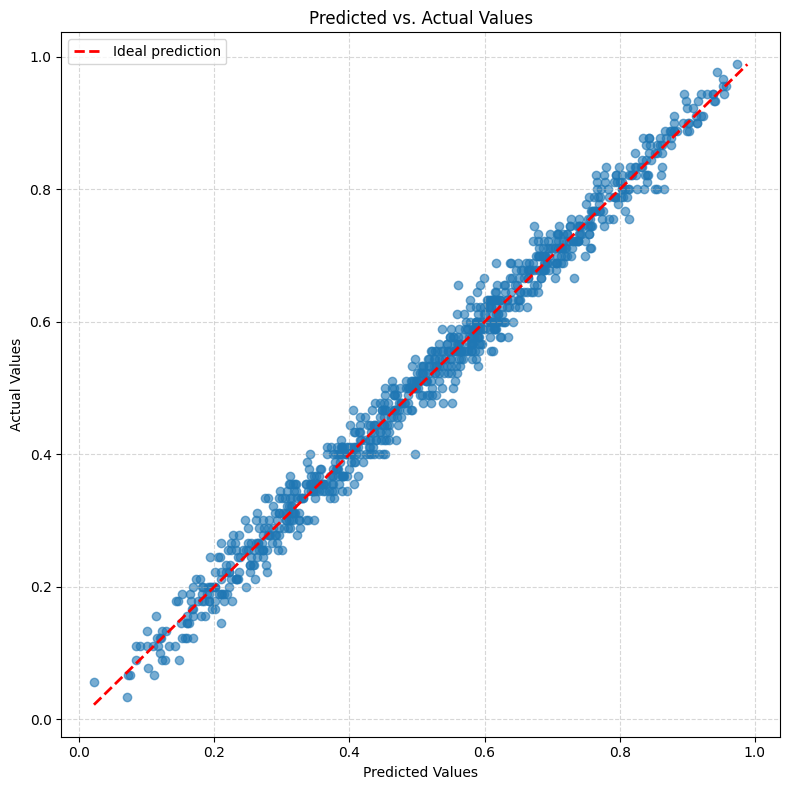

In [49]:
plot_predicted_vs_actual_seaborn(y_test,y_pred_test)



### use  XGBoost for Regression



In [50]:
modellllll=XGBRegressor()
#train model
modellllll.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [51]:
y_pred_val=modellllll.predict(X_val)
e1=mean_squared_error(y_val, y_pred_val)
print('MSE for validation data ',e1)

MSE for validation data  0.000654184040753987


In [52]:
y_pred_test=modellllll.predict(X_test)
e2=mean_squared_error(y_test, y_pred_test)
print('MSE for testing data ',e2)

MSE for testing data  0.0006934166715424443


In [53]:

pd.DataFrame(np.c_[y_pred_test, y_test,np.sqrt(y_pred_test-y_test)/(2*len(y_test))], columns=["prediction", "Actual","cost error"])



,prediction,Actual,cost error
0,0.192156,0.188889,0.000032
1,0.311807,0.288889,0.000085
2,0.516270,0.488889,0.000093
3,0.629256,0.611111,0.000076
4,0.325656,0.355556,NaN
...,...,...,...
884,0.591916,0.622222,NaN
885,0.624381,0.611111,0.000065
886,0.903754,0.911111,NaN
887,0.266332,0.255556,0.000058


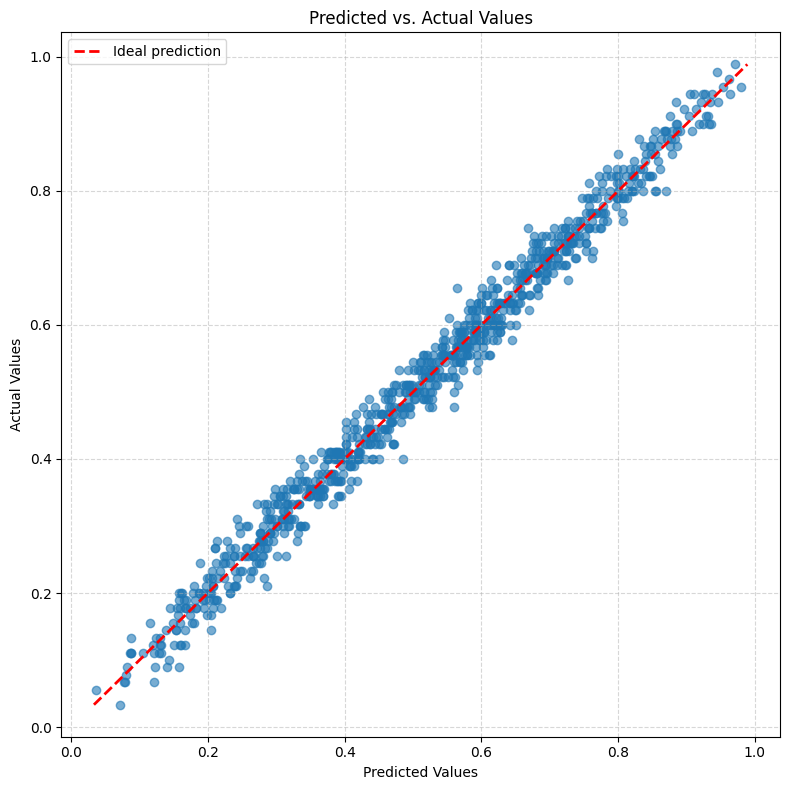

In [54]:
plot_predicted_vs_actual_seaborn(y_test,y_pred_test)